В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.
churn_analysis.csv

Измерены следующие признаки:

    - state — штат США
    - account_length — длительность использования аккаунта
    - area_code — деление пользователей на псевдорегионы, использующееся в телекоме
    - intl_plan — подключена ли у пользователя услуга международного общения
    - vmail_plan — подключена ли у пользователя услуга голосовых сообщений
    - vmail_message — количество голосых сообщений, который пользователь отправил / принял
    - day_calls — сколько пользователь совершил дневных звонков
    - day_mins — сколько пользователь проговорил минут в течение дня
    - day_charge — сколько пользователь заплатил за свою дневную активность
    - eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
    - night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
    - intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
    - custserv_calls — сколько раз пользователь позвонил в службу поддержки
    - treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
    - mes_estim — оценка интенсивности пользования интернет мессенджерами
    - churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставьте correction=False (о том, что это значит, вы узнаете из следующих вопросов).

Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?


In [1]:
import pandas as pd
import numpy as np

In [2]:
%ls

11.ipynb             AUCs.txt                             hw4.ipynb
12.ipynb             banknotes.txt                        hw5.ipynb
13.ipynb             botswana.tsv                         hw6.ipynb
ab_browser_test.csv  challenger.txt                       hw7.ipynb
answer_1_1.txt       churn_analysis.csv                   hw8.ipynb
answer_1_2.txt       churn_analysis.csv~                  hw9.ipynb
answer_1.txt         diamonds.txt                         illiteracy.txt
answer_2_1.txt       gene_high_throughput_sequencing.csv  pines.txt
answer_2_2.txt       hw10.ipynb                           scoring/
answer_3_1.txt       hw1.ipynb                            Untitled.ipynb
answer_3_2.txt       hw2.ipynb                            water.txt


In [3]:
data = pd.read_csv('churn_analysis.csv', sep = ',', header = 0)

In [4]:
data = data.drop('id', axis=1)
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [5]:
pt = data.loc[data.treatment == 1, :].pivot_table(index="state", 
     values="area_code", columns="churn", aggfunc = len, fill_value=0)

In [6]:
pt.head()

churn,False.,True.
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5


In [7]:
#from itertools import combinations
#all_states = data.state.unique()
#for first, second in combinations(all_states, 2):
#    print(first, second)

In [8]:
states = list(set(data.state.values))
pairs = [(states[i], states[j]) for i in xrange(len(states)-1) for j in xrange(i+1,len(states))]

In [9]:
from scipy import stats

In [10]:
stats.chi2_contingency(pt, correction=False)[1]

0.70975900427784411

In [11]:
count = 0
p_values = np.array([])
for n, t in enumerate(pairs):
    subtable = pt.loc[[t[0], t[1]], :]
    array = np.array(subtable)
    if(stats.chi2_contingency(subtable, correction=False)[1] < 0.05):
        count = count + 1
    p_values = np.append(p_values, stats.chi2_contingency(subtable, correction=False)[1] )
print count, pd.DataFrame(p_values).describe(), p_values
        
    


34                  0
count  1275.000000
mean      0.501827
std       0.279722
min       0.014306
25%       0.261811
50%       0.495521
75%       0.732278
max       1.000000 [ 0.05497433  0.03866617  0.05423189 ...,  0.87190799  0.77186902
  0.90453668]


In [12]:
count = 0
p_values2 = np.array([])
for n, t in enumerate(pairs):
    subtable = pt.loc[[t[0], t[1]], :]
    array = np.array(subtable)
    if(stats.chi2_contingency(subtable, correction=True)[1] < 0.05):
        count = count + 1
    p_values2 = np.append(p_values2, stats.chi2_contingency(subtable, correction=True)[1] )
print count, pd.DataFrame(p_values2).describe(), p_values2

0                  0
count  1275.000000
mean      0.664057
std       0.253253
min       0.050044
25%       0.486674
50%       0.730948
75%       0.872053
max       1.000000 [ 0.12869432  0.09433219  0.12014042 ...,  0.80196051  0.90497165
  0.74910495]


In [13]:
#scipy.stats.fisher_exact
count = 0
p_values3 = np.array([])
for n, t in enumerate(pairs):
    subtable = pt.loc[[t[0], t[1]], :]
    array = np.array(subtable)
    if(stats.fisher_exact(subtable)[1] <0.05):
        count = count +1
    p_values3 = np.append(p_values3, stats.fisher_exact(subtable)[1])
print count, pd.DataFrame(p_values3).describe(), p_values3
        

10                  0
count  1275.000000
mean      0.648338
std       0.311891
min       0.026963
25%       0.387902
50%       0.673781
75%       1.000000
max       1.000000 [ 0.10741511  0.05407772  0.07226467 ...,  1.          1.          1.        ]


Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость. 

In [14]:
calls_and_mess = pd.DataFrame(data, columns=['day_calls','mes_estim'])

In [15]:
stats.pearsonr(data.day_calls, data.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

In [16]:
stats.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [17]:
import matplotlib.pyplot as plt
import scipy as sc

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
(stats.chi2_contingency(pt, correction=False)[0] / (pt.shape[0] * pt.shape[1]))**0.5


0.6571828793651292

In [20]:
import scipy.stats

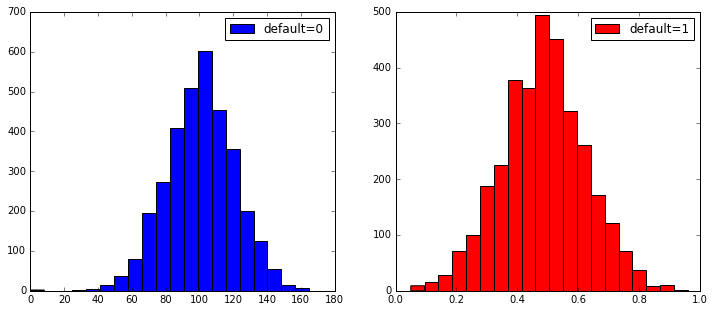

In [25]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data.day_calls, bins = 20, color = 'b', label = 'default=0')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data.mes_estim, bins = 20, color = 'r', label = 'default=1')
pylab.legend()

pylab.show()

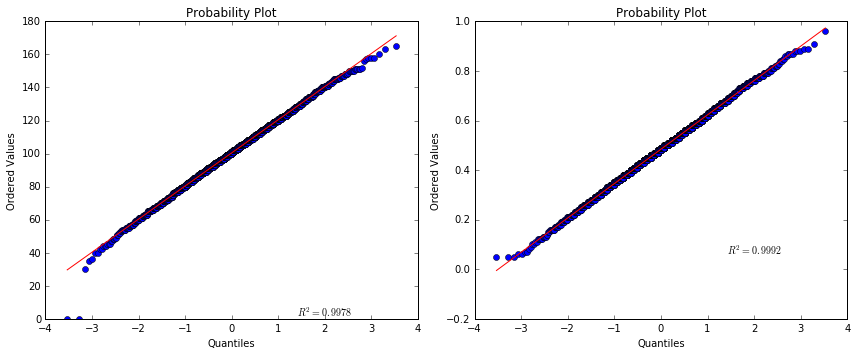

In [26]:
#ку ку графики
pylab.subplot(1,2,1)
scipy.stats.probplot(data.day_calls, plot = pyplot)

pylab.subplot(1,2,2)
scipy.stats.probplot(data.mes_estim, plot = pyplot)
pylab.tight_layout()